In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
digit_mnist=keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

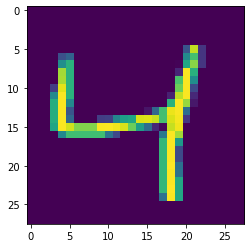

In [2]:
plt.imshow(X_train_full[2])

In [3]:
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [4]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [46]:
weights,biases=model.layers[1].get_weights()
weights
weights.shape
biases
biases.shape

(200,)

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

In [48]:
model_history=model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9285
Epoch 3/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9387
Epoch 4/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2151 - accuracy: 0.9389 - val_loss: 0.1962 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1893 - accuracy: 0.9462 - val_loss: 0.1790 - val_accuracy: 0.9483
Epoch 6/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.1482 - val_accuracy:

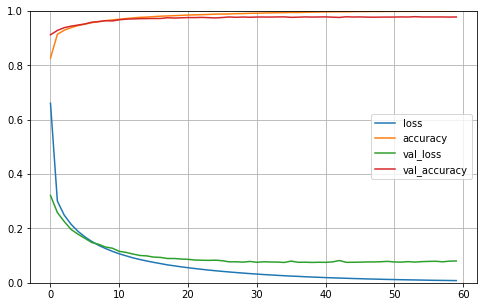

In [49]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9793


[0.07376843690872192, 0.9793000221252441]

In [51]:
X_new=X_test[:5]

In [52]:
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

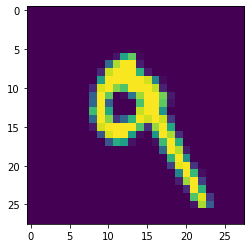

In [58]:
plt.imshow(X_test[7])

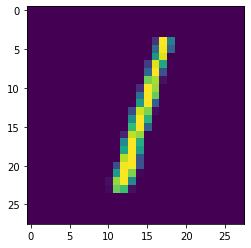

In [57]:
plt.imshow(X_test[2])

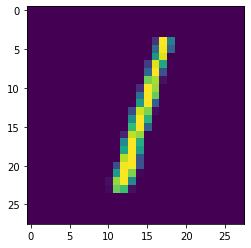

In [59]:
plt.imshow(X_new[2])

In [ ]:
y_proba[7]